In [1]:
from pathlib import Path
from torch.utils import data

import blendtorch.btt as btt

In [9]:
launch_args = dict(
    scene='/Users/davewang/Downloads/eyemodel-master-3/eyemodel/Swirski-EyeModel.blend',
    script='examples/datagen/Eye.blend.py',
    num_instances=2, 
    named_sockets=['DATA'],
    background=False
)

In [10]:
with btt.BlenderLauncher(**launch_args) as bl:
        # Create remote dataset and limit max length to 16 elements.
        addr = bl.launch_info.addresses['DATA']
        ds = btt.RemoteIterableDataset(addr, max_items=16, timeoutms=100000)
        dl = data.DataLoader(ds, batch_size=4, num_workers=4)
        
        for item in dl:
            # item is a dict with custom content (see cube.blend.py)
            img = item['image']
            print('Received', img.shape)
        # Will get here after 16/BATCH=4 iterations.

Received torch.Size([4, 256, 256, 3])
Received torch.Size([4, 256, 256, 3])
Received torch.Size([4, 256, 256, 3])
Received torch.Size([4, 256, 256, 3])


torch.Size([4, 256, 256, 3])


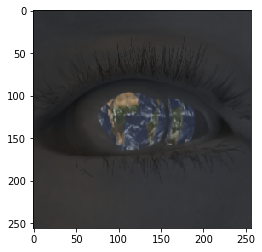

In [11]:
import matplotlib.pyplot as plt
import torch

print(img.shape)
plt.imshow(torch.pow(img[0], 1/2.2))
plt.show()